In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

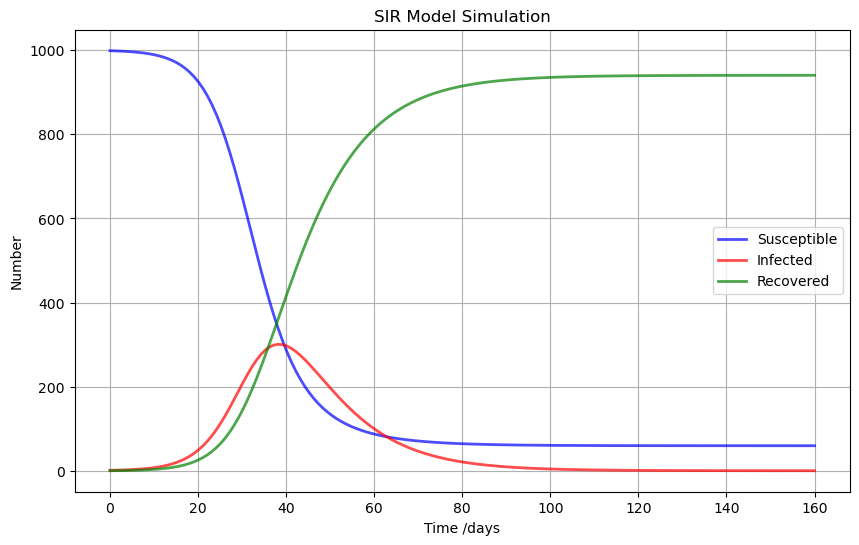

In [3]:
# Parameters
beta = 0.3  # infection rate
gamma = 0.1  # recovery rate

# Initial number of infected and recovered individuals, everyone else is susceptible
I0, R0 = 1, 0
S0 = 999  # Total population size
N = S0 + I0 + R0  # Total population

# SIR model differential equations
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Time points
t = np.linspace(0, 160, 160)

# Integrate the SIR equations over the time grid, t
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data
fig = plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
plt.xlabel('Time /days')
plt.ylabel('Number')
plt.legend()
plt.grid()
plt.title("SIR Model Simulation")
plt.show()